[Back to Table of Contents](https://www.shannonmburns.com/Psyc158/intro.html)

[Previous: Chapter 19 - Model Bias](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-19.ipynb)

In [115]:
# Run this first so it's ready by the time you need it
install.packages("dplyr")
install.packages("ggformula")
install.packages("supernova")
library(dplyr)
library(ggformula)
library(supernova)
trackscores <- read.csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/trackscores.csv")

Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//Rtmpo3HL6S/downloaded_packages


Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//Rtmpo3HL6S/downloaded_packages


Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//Rtmpo3HL6S/downloaded_packages


# Chapter 20 - Traditional Statistical Tools

## 20.1 Different teaching philosophies

In this course you have spent a long time learning about how to make predictions and do inference with the general linear model. However, most statistics students don't learn this framework for doing analysis. Instead, they learn an assortment of different statistical procedures like the t-test, ANOVA, chi-square, etc. Indeed many practicing researchers also use these tools instead of the GLM.

So why learn the GLM at all if not as many people use it? There are two pedagogical reasons for why this course emphasized this method instead of the traditional content:

1) **Traditional tools require learning how to do hypothesis testing first** - Traditional methods fundamentally depend on Null Hypothesis Significance testing. They start with defining a null hypothesis and cannot be interpreted without computing a t/F score and finding a p-value. This means to learn how to use these tools, students first have to learn about sampling distributions and significance testing. This is a rather abstract thing to learn first and impedes understanding for many people. This leads them to using intellectual short cuts like "always look for p < 0.05" despite the dangers of overrelying on that number. 

2) **Traditional tools are more variable, harder to remember** - When first starting out, the list of all the common statistical tools often seems daunting. They are calculated all different ways with different names and it's hard to remember what goes where. In contrast, the GLM is ultimatly one tool - $Y_i = b_0 + b_1X_i + e_i$. How many predictors you add to the equation and how you interpret the coefficients varies depending on your use situation, but just knowing about this one equation gets you 80% of the way there, making it a better starting point for building conceptual understanding.

Despite the advantages of the GLM however, many people still use the traditional tools. Thus, it is good for you to be able to identify them and understand how they map onto what you have learned with the GLM. Ultimately, the GLM and these tools will give you the same answer and you can choose which you prefer in your own research. Knowing both will enable you to read and understand research reports no matter what method the authors used. You may even find that most of these tools build on concepts you've already learned. They're just a different way of showing that information. 

## 20.2 One-sample t-test

Previously in chapter 11, we were introduced to the idea of a t-test. To explain it in more depth, let's start with the **one-sample t-test**. 

Let's say you are a track coach and you're assessing the progress of your runners' training. They all recorded their best times for running the 400m when they initially joined the team. Now after a month of training with track drills, you want to know if they, as a group, have improved. 

Here is some data from your team. We will filter it down to just those scores at tryouts and 1 month later at the first meet, then calculate their change in running times. Negative scores mean they got faster (less time to complete the 100m), positive scores mean they ran slower.

In [119]:
#take a look at how this dataset was organized
head(trackscores)

tryout_scores <- filter(trackscores, session=="tryouts", condition=="track-training")
meet1_scores <- filter(trackscores, session=="meet1", condition=="track-training")

change_scores <- meet1_scores$time - tryout_scores$time

,athlete,session,condition,weight_training,track_training,time
,<int>,<chr>,<chr>,<int>,<int>,<dbl>
1,1,tryouts,no-training,0,0,48.50
2,2,tryouts,no-training,0,0,48.87
3,3,tryouts,no-training,0,0,49.28
4,4,tryouts,no-training,0,0,46.97
5,5,tryouts,no-training,0,0,48.18
6,6,tryouts,no-training,0,0,50.36


If our question is restricted to just our team of runners and no one else, we can figure out their improvement really easily. We simply find the mean of their change scores:

In [120]:
mean(change_scores)

[1] -0.049

Great! This number means that, on average, our team ran faster than before after training for a month. If we only care about evaluating our current team, we can stop here and don't need to use any more statistics. 

But let's say our question goes beyond just our team. If we were to recruit new runners the following year, would they also improve their scores with this training regimen? Is it good enough to use for everyone?

Now we are hypothesizing about data we don't have. At this point we need inferential statistics, and a one-sample t-test can help.

A one-sample t-test answers a particular kind of question: is the mean of some data $\bar{X}$ likely or unlikely to be from a population with a specific $\mu$? In other words, if we think the population $\mu$ is a particular value and our data sample is drawn from that population, is it reasonable or surprising to find that our sample's mean is the value we measured? 

For how this translates to our specific example: is our data sample likely to happen even in a population of runners who on average didn't improve? 

In order to do a one-sample t-test to answer this question, we first need to set down our idea about what $\mu$ should be. This is specifying the null hypothesis. For our particular example, the data we are evaluating are improvements in running time. We want to know if these data came from a population of scores where there's no improvement. In such a population some people might run a bit faster than their initial time, some a bit slower, but on average there's no change. Thus, to set our null hypothesis: 

$$H_0: \mu = 0$$

When we calculated our data sample earlier, it was about -0.32, not 0. Does that mean we can conclude these runners did not come from a population of no improvement? 

Not necessarily. Remember, due to random sampling, it is frequently possible to get a sample mean that is not the same value as the population mean:

In [52]:
set.seed(10)
sim_sample <- rnorm(10, mean=0, sd=1) #random sample of 10 scores from population with mean 0
mean(sim_sample)

[1] -0.4906568

Thus we need a way refining our question: given a population $\mu$ *and* an expected variation among samples from that population, is our sample really surprising or not?

Enter the t-value. It is a way of scaling the difference between a sample and hypothesized population mean by the standard error of that population. For a one-sample t-test, this is calculated as: 

$$t = \frac{\bar{X} - \mu}{SEM}$$

If you recall from chapter 15, SEM in turn is calculated as:

$$SEM = \frac{\hat{σ}}{\sqrt{N}}$$

All this together means that a t-value will be larger when there's a bigger difference between our sample mean and the hypothesized population mean, or when the standard error is smaller. 

The type of t-score we can get falls somewhere in the t distribution that we first encountered in chapter 16:

<img src="images/ch16-tdist.png" width="600">

You'll notice that the exact shape of the t distribution changes based on the degrees of freedom for our sample. That's because higher sample size Ns reduce the standard error, making it easier to get large t values even when a sample really is from a population with mean $\mu$. The cumulative probability outside of our t-value is the corresponding p-value for that t-score, so t-scores in smaller sample sizes have larger p-values because there's a relatively larger amount of the distribution that is more extreme than that value compared to the t-distribution made of larger sample sizes.  

Altogether, this means that to answer our question about whether our data likely come from a population of no improvement, we need to calculate a t-score and its associated p-value. The larger this t-score is, the more suprising it would be to draw a sample with our mean given a true population $\mu = 0$. If the associated p-value is <0.05, we would decide it's so surprising that our sample probably came from a different sort of population instead - one with some alternative $\mu$ that suggests improvement due to our training regimen. 

R provides us with a built-in function to quickly compute a one sample t-test:

In [54]:
t.test(change_scores)


	One Sample t-test

data:  change_scores
t = -1.7664, df = 9, p-value = 0.1111
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.72751897  0.08951897
sample estimates:
mean of x 
   -0.319 


The output of this function gives us information about the calculated t-score (-1.7664), the degrees of freedom of the test (9, which is N-1), and the p-value (0.1111). It also gives us a 95% CI for our estimate of the mean, [-0.73, 0.09]. Note that a t-value can be positive or negative, signifying if our sample mean is higher or lower than the hypothesized population mean.

Based on these results, there is not enough evidence to reject the null hypothesis that our training regimen results in no improvement. In APA format, we would write these results as "The mean change in running time was -0.32 seconds [-0.73, 0.09], but there was no significant improvement in running time for this sample of runners (*t(9)* = -1.77, *p* = 0.11)." 

The different parts of doing a t-test (calculating a mean, null hypothesis, standard error, and p-value) are all concepts you've learned before. For this reason, a t-test is actually just another way of getting to the same answer as we previously did with the general linear model. Check out the t and p values in the model output below, and compare them to the results of the above t-test:

In [55]:
summary(lm(change_scores ~ NULL))


Call:
lm(formula = change_scores ~ NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7510 -0.3685 -0.1510  0.2415  1.1690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -0.3190     0.1806  -1.766    0.111

Residual standard error: 0.5711 on 9 degrees of freedom


In the null model of the GLM framework, we are estimating the sample mean as $b_0$ and evaluating if it is significantly different from 0. In a one-sample t-test, we are evaluating whether a sample mean $\bar{X}$ is significantly different from the null hypothesis $\mu = 0$. These are the exact same question, just posed different ways. Thus, you can get the same result using a null model form of the GLM or the one-sample t-test.

However, we should also point out that in the null model, the significance of $b_0$ is specifically compared in the context of a null hypothesis where $\beta_0 = 0$. In the one-sample t-test, we can be more general that this. We don't have to restrict ourselves to a null hypothesis of 0. For instance, let's imagine that instead of running improvement, we are interested in whether our team's new running times are significantly better than the [Division III track and field recruiting cut off](https://www.ncsasports.org/mens-track-and-field/scholarship-standards) of 51.76. First we calculate the mean of everyone's new running times:

In [57]:
mean(meet1_scores$time)

[1] 48.084

Then we specify a null hypothesis:

$$H_0: \mu = 51.76$$

This is a different null hypothesis than before. Now, we are wondering if our sample is likely to come from DIII track and field athletes, or if we should conclude they come from an even faster population.

To specify a null hypothesis in a t-test that is different than 0, add the ```mu=``` argument to the ```t.test()``` with this specific null hypothesis value.

In [58]:
t.test(meet1_scores$time, mu=51.76)


	One Sample t-test

data:  meet1_scores$time
t = -9.5046, df = 9, p-value = 5.453e-06
alternative hypothesis: true mean is not equal to 51.76
95 percent confidence interval:
 47.20909 48.95891
sample estimates:
mean of x 
   48.084 


Based on these results, our sample mean of 48.08 would be very unusual if it were drawn from a population with $\mu = 51.76$ (p < 0.001). Thus we reject this null hypothesis in favor of the alternative hypothesis that our team is from a faster population.  

## 20.3 Independent-samples t-test

A one sample t-test is used when you have one group of data, and want to understand how likely it is that that one group came from a particular population. If you have two separate groups of data and want to be able to distingush them from each other, this calls for a different kind of t-test called an **independent samples t-test** or **two-sample t-test**. 

Let's say you're still the track coach, but this time you want to compare how two different kinds of training impact your athletes. This time, you have half the team run track drills for a month and half the team do weights in the gym. Afterwards, you assess their running time on the 400m at their first meet. In this situation you no longer have one group of data like last time. You have two groups who went through different experiences that might make them different from each other. 

In [72]:
track_training <- filter(trackscores, session=="meet1", condition=="track-training")
weight_training <- filter(trackscores, session=="meet1", condition=="weight-training")

An independent samples t-test answers the question "are these two groups likely drawn from the same population?" The null hypothesis of this question would be: 

$$H_0: \mu_1 = \mu_2$$

Where $\mu_1$ is the population from which group 1 came, and $\mu_2$ is the population from which group 2 came. The alternative hypothesis, then, is that they come from different populations.

An independent samples t-score is calculated a bit differently than a one-sample t-score. This one comes out to: 

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

where $s_p$ stands for the *pooled* standard deviation, a way of combining the standard deviations of two samples:

$$s_p = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 + 2}} $$

While this equation is more complicated, in general this t-score gets larger based on the same factors as the one-sample t-test. You will get a larger t-score, and thus more likely to reject the null hypothesis, if there is a large difference between the group means *or* if the sample sizes are large. 

In R we can use the same ```t.test()``` function to do an independent-samples t-test. We just need to include more arguments. Specifically, we need to pass the separate groups to compare as separate vectors, and then add a ```var.equal=``` flag to tell this function to use the pooled variance.

In [73]:
t.test(track_training$time, weight_training$time, var.equal=TRUE)


	Two Sample t-test

data:  track_training$time and weight_training$time
t = 2.1185, df = 18, p-value = 0.0483
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.008564465 2.053435535
sample estimates:
mean of x mean of y 
   48.354    47.323 


Based on this result, what would you conclude about which populations each group likely came from?

Again, it is possible to get this same result using the GLM approach we already know. However we have to reshape our data a bit in order to make this possible. In the ```t.test()``` command above we wanted to compare values on the outcome variable for the two different groups, so we needed to divide the data in this variable into two separate vectors. To use ```lm()```, we don't separate our data into different datasets. We merely include another variable that stores information about which group is which. 


Call:
lm(formula = time ~ condition, data = trainingdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8230 -0.7315  0.2120  0.6795  1.6960 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               48.3540     0.3441 140.515   <2e-16 ***
conditionweight-training  -1.0310     0.4867  -2.119   0.0483 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.088 on 18 degrees of freedom
Multiple R-squared:  0.1996,	Adjusted R-squared:  0.1551 
F-statistic: 4.488 on 1 and 18 DF,  p-value: 0.0483


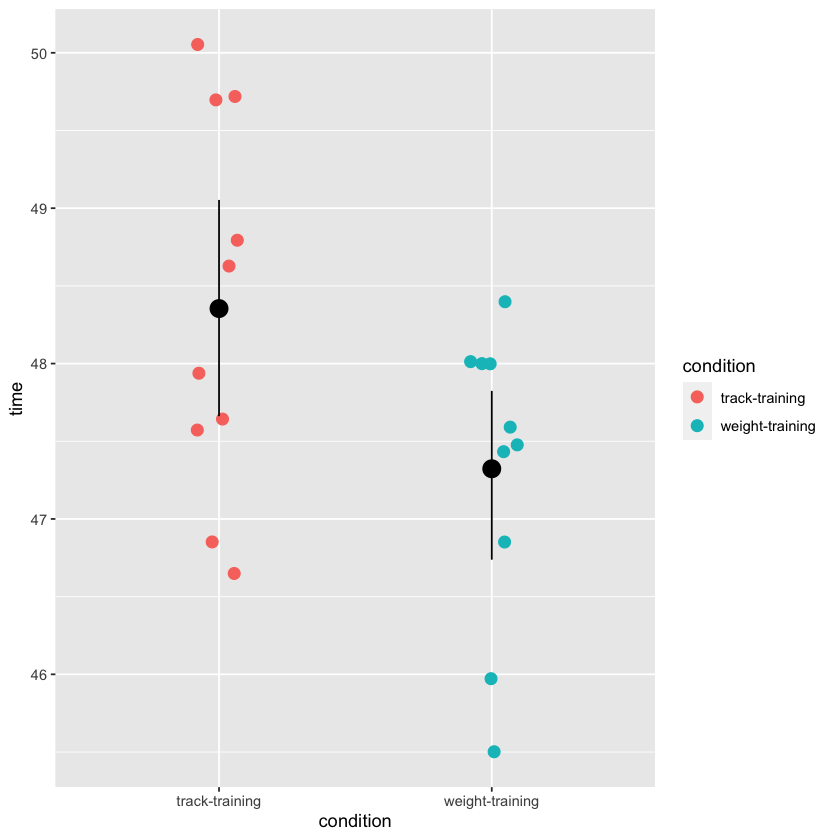

In [93]:
#filtering to every time score during meet1, for track-training or weight-training athletes
trainingdata <- filter(trackscores, session=='meet1',
                       (condition=='track-training' | condition=='weight-training'))

#fitting glm version of test
summary(lm(time ~ condition, data = trainingdata))

#visualizing group differences
gf_jitter(time ~ condition, data = trainingdata, size=3, color = ~condition, width=0.1) %>% 
    gf_summary(fun.data = "mean_cl_boot", size = 2, color = 'black')

## 20.4 One-way ANOVA

T-tests allow you to investigate differences in means between a population and one group of data, or two separate groups. Beyond that, you might encounter a situation where you want to investigate differences between more than two groups. E.g., instead of comparing just the athletes who did track training vs. weight training, you also have athletes who did neither type or both types of training. 

There's no t-test that helps you analyze more than two groups. Instead, we need to expand into a different kind of test known as a **one-way ANOVA**. 

To start, we recognize that we're interested in comparing the average 400m running time for the 4 different training conditions. In that sense, we’re still hypothesizing about differences in means, but between several groups. Specifically, it would be pretty uninteresting if no type of training made any difference in running time and all athletes were from the same population. Thus, our null hypothesis is:

$$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$$

Where each $\mu$ is the population from which that group number came. In contrast, the alternative hypothesis is that *at least one* of the four different training conditions results in different running times. We're not trying to predict which group(s) is different from which other group(s), just that at least one of those equal signs in the null hypothesis is not true. 

Because there are many different ways the null hypothesis could be false (1 =/= 3, 2 =/=3 & 4, etc.), this null hypothesis isn't possible to test in the t-test framework. There isn't one group difference to compare to one population parameter. Instead we use ANOVA, which stands for Analysis of Variance.

The way this works is by looking at variation in data and figuring out how much variation is within a group of data, vs. between different groups. 

<img src="images/ch20-btwn-within.png" width="800">

To quantify variation, we've used the idea of sum of squares before. We can use it again here to calculate new* kinds of sum of squares to represent, instead of deviations between data and model predictions, deviations between groups or within groups. We'll denote this as $SS_w$ for the within-group variation, where $\bar{Y}_g$ is the mean of some group G:

$$SS_w = \sum_{i=1}^{N}(Y_i-\bar{Y}_G)^2$$

And here is $SS_b$ for the between-groups variation, where $\bar{Y}$ is the mean of all data regardless of group:

$$SS_b = \sum_{i=1}^{N}(\bar{Y}_G - \bar{Y})^2$$

Now that we've defined these different types of sum of squares, we can ask a specific mathematical question: is there more variation between the groups of data than within a group? Are the differences between individual scores because of which group they belong to, or just randomness? A ratio is a good way to represent this question:

$$\frac{SS_b}{SS_w}$$

But wait, if we're calculating sum of squares then we know it's problematic to not consider the size of our dataset. Thus we should convert these values to mean squared error by dividing SS by the degrees of freedom. As usual, the degrees of freedom corresponds to the number of ways data can vary once we have some existing information about it. For the within-groups variability, what we’re calculating is the variation of the individual observations (N data points) around the group means (all the $\bar{Y}_G$ estimates). In contrast, for the between groups variability, we’re interested in the variation of the group means (G data points) around the Grand Mean (1 $\bar{Y}$ estimate). Therefore, the degrees of freedom here are:

$$df_b = G - 1$$
$$df_w = N - G$$

The ratio of mean squared errors then is:

$$\frac{SS_b / df_b}{SS_w / df_w} = \frac{MSE_b}{MSE_w}$$

This ratio has a specific name: it is the **F-ratio** or the **F-statistic** ([sound familiar?](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-17.ipynb#scrollTo=509057e3)).

That's all a one-way ANOVA does: it calculates an F-statistic to compare between to within-group variation. If the value of this F-statistic is sufficiently large, that means the differences in the group means are so large that we'd be very surprised to hear they were actually sampled from the same population. We'd reject the null hypothesis in favor of an alternative, that at least one came from a different population. 

That brings us to doing a one-way ANOVA test in R. It is a fairly simple bit of code, using the function ```aov()```. You no longer need to save the data for the different groups into different vectors - we can keep it in one dataset like with a GLM model and simply pass a formula to ask how does the outcome variable vary as a function of group.

Call:
   aov(formula = time ~ condition, data = trainingdata)

Terms:
                condition Residuals
Sum of Squares   17.95681  45.93918
Deg. of Freedom         3        36

Residual standard error: 1.129641
Estimated effects may be unbalanced

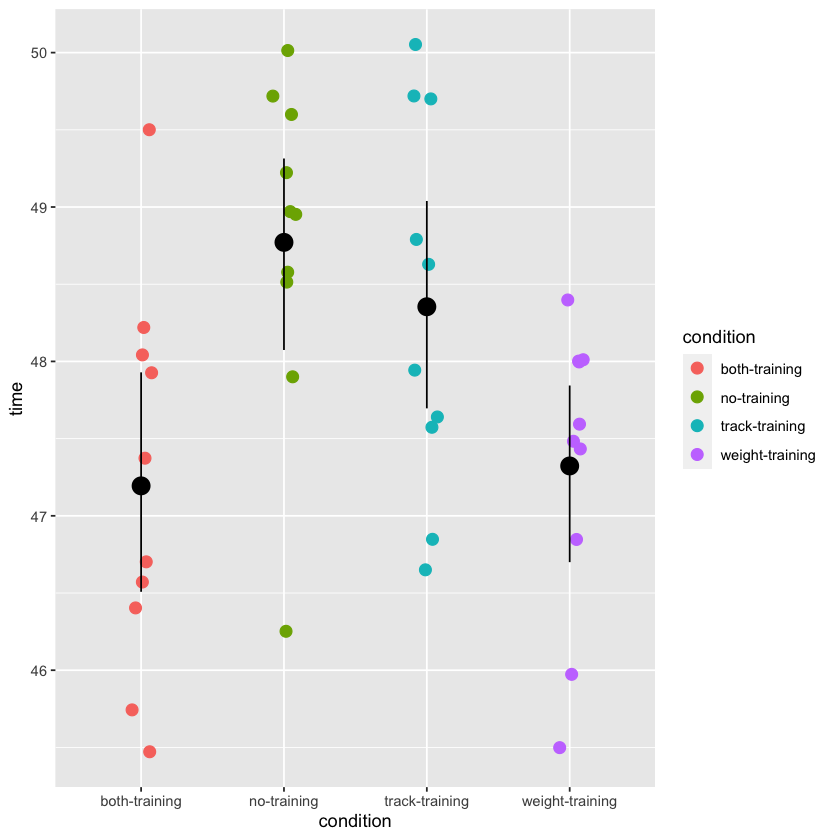

In [104]:
#choosing all running times at meet1, regardless of condition
trainingdata <- filter(trackscores, session=='meet1')

#running one-way ANOVA test
anova_results <- aov(time ~ condition, data = trainingdata)
anova_results

#visualizing group differences
gf_jitter(time ~ condition, data = trainingdata, size=3, color = ~condition, width=0.1) %>% 
    gf_summary(fun.data = "mean_cl_boot", size = 2, color = 'black')

The output of this code tells you $SS_b$ (Sum of Squares in the 'condition' column) and $SS_w$ (Sum of Squares in the 'Residuals' column). To get the corresponding F-statistic and p-value, wrap this command in the ```summary()``` function:

In [101]:
summary(anova_results)

            Df Sum Sq Mean Sq F value  Pr(>F)   
condition    3  17.96   5.986   4.691 0.00726 **
Residuals   36  45.94   1.276                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Since this p-value is <0.05, we'd reject the null hypothesis that all groups of athletes come from the same population. At least one of the group means is sufficiently different from at least one other that we decide there are different populations involved here - meaning, type of training matters for running time. In APA format, we'd write this as "there was a significant effect of training type on running time *F*(3,36) = 4.691, *p* = 0.00726."

Now, at this moment we should pause so I can let you know that I actually lied to you earlier. $SS_b$ and $SS_w$ aren't new kinds of sum of squares at all. To see what I mean, here's the $SS_{model}$ and $SS_{error}$ from a GLM with the same formula:

In [102]:
glm_results <- lm(time ~ condition, data = trainingdata)
supernova(glm_results)

 Analysis of Variance Table (Type III SS)
 Model: time ~ condition

                             SS df    MS     F   PRE     p
 ----- --------------- | ------ -- ----- ----- ----- -----
 Model (error reduced) | 17.957  3 5.986 4.691 .2810 .0073
 Error (from model)    | 45.939 36 1.276                  
 ----- --------------- | ------ -- ----- ----- ----- -----
 Total (empty model)   | 63.896 39 1.638                  

$SS_b$ is the exact same value as $SS_{model}$, just with a different name. Both refer to the amount of variation explained by this grouping variable. Likewise, $SS_w$ is the same as $SS_{error}$, the amount of variation left unexplained. The F-statistic and p-value are also the same. That's why this is called an ANOVA table - it's the results of an ANOVA test. If we output the summary of a GLM model with ```condition``` predicting ```time```: 

In [103]:
summary(glm_results)


Call:
lm(formula = time ~ condition, data = trainingdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5210 -0.7315  0.1775  0.7592  2.3060 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               47.1940     0.3572 132.113  < 2e-16 ***
conditionno-training       1.5770     0.5052   3.122  0.00354 ** 
conditiontrack-training    1.1600     0.5052   2.296  0.02760 *  
conditionweight-training   0.1290     0.5052   0.255  0.79991    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.13 on 36 degrees of freedom
Multiple R-squared:  0.281,	Adjusted R-squared:  0.2211 
F-statistic: 4.691 on 3 and 36 DF,  p-value: 0.00726


That F-statistic and p-value for the significance of the whole model is also the same. Thus, a one-way ANOVA test is the exact same as testing a whole GLM model with multiple categorical predictors.

Now there are some differences between a one-way ANOVA and GLM on the other kinds of information you get from the model. Specifically, the significance of differences between *particular* pairs of groups. At baseline, an ANOVA test can't tell you anything about this. It only tests the null hypothesis that all groups are the same. Any one pair being different results in rejecting the null hypothesis, but you don't know which pair(s) of groups were different. To get this answer, you need to perform an independent-samples t-test on each unique pair. Because this involves many tests, you also have to correct for multiple comparisons. 

In R, you can do this with one function ```pairwise()```, which takes an object holding the results of an ANOVA test and returns the significance of the difference between every unique group:

In [105]:
pairwise(anova_results)



── Tukey's Honestly Significant Differences ────────────────────────────────────

Model: time ~ condition

condition

Levels: 4

Family-wise error-rate: 0.05





  group_1         group_2        diff pooled_se      q    df  lower  upper p_adj
  <chr>           <chr>         <dbl>     <dbl>  <dbl> <int>  <dbl>  <dbl> <dbl>
1 no-training     both-traini…  1.577     0.357  4.415    36  0.216  2.938 .0178
2 track-training  both-traini…  1.160     0.357  3.247    36 -0.201  2.521 .1179
3 weight-training both-traini…  0.129     0.357  0.361    36 -1.232  1.490 .9941
4 track-training  no-training  -0.417     0.357 -1.167    36 -1.778  0.944 .8420
5 weight-training no-training  -1.448     0.357 -4.053    36 -2.809 -0.087 .0333
6 weight-training track-train… -1.031     0.357 -2.886    36 -2.392  0.330 .1923

The method of multiple comparison correction that ```pairwise()``` is using is called Tukey's Honestly Significance Differences, which adjusts the calculated p-values up rather than pulling down the critical p-value. 

Now compare these numbers to those in the summary report of the GLM model (where "both-training" is the reference group because it is first in the alphabet). For instance, look at the difference between the "no-training" and "both-training" conditions here, and then look at the estimate of the effect of "no-training". Both of these numbers are the same (1.577), indicating that both methods are finding the difference in means between the "both-training" condition and the "no-training" condition. However, the p-values for these lines are different.

Why is that? The reason is, with the GLM model you don't need to do multiple comparisons correction. This is because a multiple regression is just one test. It calculates the standard error of each coefficient at once, in the context of the other predictors. This means it's essentially already doing multiple comparison correction. Further, it is only doing this correction for 3 comparisons with the reference group ("both-training" against the other three). 

In contrast with the pairwise tests after the ANOVA, these are all done independently on separate subgroups of data. In addition, all 6 possible pairwise comparisons are done. With more comparisons, that means you have to correct the p-value by more in order to keep the family-wise error rate at $\alpha = 0.05$. With more correction, it is harder to find any one comparison as significant. This is why the comparison between "both-training" and "track-training" is significant in the GLM (effect of "track-training", p = 0.0276) but not significant in the pairwise table of the ANOVA results (p = 0.1179). However, this is also why the pairwise table has comparisons for conditions like "weight-training" and "track-training", while the GLM doesn't. To get that result with a GLM approach, one of those conditions would need to be treated as the reference group.  

## 20.5 Factorial ANOVA

Of the traditional tools we've covered so far in this chapter, you can probably detect a general trend. So far we've looked at a fairly simple experimental design: each person falls into only one of several groups, and we want to know whether these groups have different means on some outcome variable. This assumes that there is only variable that matters for differences in the outcome value - which of these groups someone is in.

But in the multiple regression version of the GLM framework, we learned that multiple different predictor variables can have separate effects on an outcome. They can even interact with each other, such that the effect of one predictor changes as a function of the value of another predictor. This might be a better way of understanding our athlete data - instead of four different categories of training regimens, maybe there is a more general effect of track-training and of weight-training that combine in order to produce someone's running time. Being in the "both-training" condition just means being a part of both of these general groups, instead of its own unique category.

In the ANOVA approach to statistics, taking into account the effect of multiple grouping variables is called **factorial ANOVA**. Sometimes it is also called something like two-way ANOVA (which means two separate predictor variables) or 2x3 ANOVA (meaning there are two levels in the first predictor and 3 levels in the second). Like the one-way ANOVA, factorial ANOVA is a method of comparing group means to see if they come from the same population. So a sensible place to start would be to be explicit about a null hypothesis for these means. However, the fact the different training groups are made of combinations of multiple variables means there are several different means that one might be interested. To see this, let’s start by thinking about all the different sample means that we can calculate for this kind of design: 

Firstly, there’s the obvious idea that we might be interested in this table of group means for our athletes at their first meet:

**Group means of running time for each combination of the separate training variables**

|                    | No weight training | Weight training | Any weight training |
| :----------------: | :----------------: | :-------------: | :-----------------: |
| No track training  | 48.771             | 47.323          | 48.047              |
| Track training     | 48.354             | 47.134          | 47.774              |
| Any track training | 48.563             | 47.229          | 47.896              |

In this table, the number in each cell stands for the group mean with that combination of track training type (row) and weight training type (column). The values in the last row are the means of each weight training group regardless of what type of track training they did. The values in the last column are the means of each track training group regardless of what type of weight training they did - aka the **marginal means**. The bottom right cell holds the grand mean, or the mean running time of everyone regardless of their value on any training variable.

These are all group means, which are statistical estimates. That means there are population parameter versions of these values that our estimates came from. We can express our table above with those values instead: 


|                    | No weight training | Weight training | Any weight training |
| :----------------: | :----------------: | :-------------: | :-----------------: |
| No track training  | $\mu_{11}$         | $\mu_{12}$      | $\mu_{1.}$          |
| Track training     | $\mu_{21}$         | $\mu_{22}$      | $\mu_{2.}$          |
| Any track training | $\mu_{.1}$         | $\mu_{.2}$      | $\mu_{..}$          |

We have a bunch of $\mu$ values with different subtexts. $\mu_{11}$ means the population mean for the group in the first value of track training type and first value of the weight training type. $\mu_{12}$ would be the population mean for the group in the first value of track training type and second value of the weight training type, and so on. A dot in the notation means any value for that variable. 

Now that we have this notation, it is straightforward to formulate and express some hypotheses. Let’s suppose that the goal is to find out two things: firstly, does track training have any effect on running time? And secondly, does weight training have any effect on running time? Formally, we write down our null hypotheses in terms of the equality of marginal means:

row means are the same: $H_0: \mu_{1.} = \mu_{2.}$

column means are the same: $H_0: \mu_{.1} = \mu_{.2}$

Since this is a type of ANOVA, to test these hypotheses we investigate the within and between sum of squares for these groups. At this point, this is done the same way as a one-way ANOVA (which, in the case of two marginal means groups like here, also reduces to being the same thing as an independent samples t-test - it's all connected!). The one-way ANOVA is applied for the effect of track training and separately for the effect of weight training. 

In our dataset, information about athletes' training is also stored in two variables ```track_training``` and ```weight_training```. Try using the ```aov()``` function yourself using the formula ```time ~ track_training + weight_training``` in the dataset ```trainingdata``` in order to run this factorial ANOVA.

In [107]:
#run aov() with the formula time ~ track_training + weight_training
anova_results <- NULL

summary(anova_results)

                Df Sum Sq Mean Sq F value   Pr(>F)    
track_training   1   0.75   0.745   0.598 0.444418    
weight_training  1  17.00  17.004  13.634 0.000713 ***
Residuals       37  46.15   1.247                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In this table, remember we're getting $SS_b$ for the effect of each predictor (in the Sum Sq column) as well as $SS_w$ for the between group variation (that which is not explained by the grouping variables). We also get a corresponding F and p value for each separate predictor that tells us whether there is a significant difference in group means for different levels of that predictor. 

Compare this result to the GLM version of this test:

In [108]:
summary(lm(time ~ track_training + weight_training, data = trainingdata))


Call:
lm(formula = time ~ track_training + weight_training, data = trainingdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4490 -0.7380  0.1995  0.8313  2.3780 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      48.6990     0.3058 159.228  < 2e-16 ***
track_training   -0.2730     0.3532  -0.773 0.444418    
weight_training  -1.3040     0.3532  -3.692 0.000713 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.117 on 37 degrees of freedom
Multiple R-squared:  0.2778,	Adjusted R-squared:  0.2387 
F-statistic: 7.116 on 2 and 37 DF,  p-value: 0.002428


As you may be unsurprised to find at this point, the hypothesis testing results are exactly the same. The $b_1$ estimate is not different enough from 0 to be considered significant (i.e., not a big enough group difference between different levels of track training). In contrast, the $b_2$ coefficient is different enough from 0 to be significant (i.e., a large group difference between different levels of weight training). 

That's how to run a factorial ANOVA to test the differences in marginal means. However, that might not be the full story with our data. We may decide that $\mu_{.1}$ and $\mu_{.2}$ are different from each other, but what about $\mu_{11}$ and $\mu_{12}$ or $\mu_{21}$ and $\mu_{22}$? Is there always going to be the same difference in running time regardless of the value of track training, or might there be an interaction between these two variables? 

It is possible to include an interaction in a factorial ANOVA as well. However, since ANOVAs are all about sum of squares, we need to be able to compute a sum of squares for the interaction term as well as the main effects. We won't deal with the math of how to do this in the ANOVA framework, but rest assured you can still think of it as the variation in the outcome variable uniquely explained by the interaction term. Running this factorial ANOVA in R, we use the code: 

In [112]:
#same formula as an interaction for a GLM 
anova_results <- aov(time ~ track_training*weight_training, data = trainingdata, type='III')

anova_results
summary(anova_results)

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘type’ will be disregarded”


Call:
   aov(formula = time ~ track_training * weight_training, data = trainingdata, 
    type = "III")

Terms:
                track_training weight_training track_training:weight_training
Sum of Squares         0.74529        17.00416                        0.20736
Deg. of Freedom              1               1                              1
                Residuals
Sum of Squares   45.93918
Deg. of Freedom        36

Residual standard error: 1.129641
Estimated effects may be unbalanced

                               Df Sum Sq Mean Sq F value   Pr(>F)    
track_training                  1   0.75   0.745   0.584 0.449712    
weight_training                 1  17.00  17.004  13.325 0.000825 ***
track_training:weight_training  1   0.21   0.207   0.162 0.689252    
Residuals                      36  45.94   1.276                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Comparably, as a GLM:

In [110]:
summary(lm(time ~ track_training*weight_training, data = trainingdata))


Call:
lm(formula = time ~ track_training * weight_training, data = trainingdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5210 -0.7315  0.1775  0.7592  2.3060 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     48.7710     0.3572 136.528   <2e-16 ***
track_training                  -0.4170     0.5052  -0.825   0.4146    
weight_training                 -1.4480     0.5052  -2.866   0.0069 ** 
track_training:weight_training   0.2880     0.7144   0.403   0.6893    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.13 on 36 degrees of freedom
Multiple R-squared:  0.281,	Adjusted R-squared:  0.2211 
F-statistic: 4.691 on 3 and 36 DF,  p-value: 0.00726


In [113]:
table(trainingdata$condition)


  both-training     no-training  track-training weight-training 
             10              10              10              10 

## 20.4 Chi-square


## 20.5 Repeated measures tests


[Next: Chapter 21 - Alternate Approaches - Bayesian Statistics](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-21.ipynb)